In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from scipy import stats

In [259]:
df = pd.read_csv('officers_only.csv', low_memory=False)
df = df[df['sustained'] == 1]

In [260]:
no = df[df['disciplined'] == 0]
yes = df[df['disciplined'] ==1].sample(no.shape[0])
df = pd.concat([no, yes])

<AxesSubplot:xlabel='salary', ylabel='disciplined'>

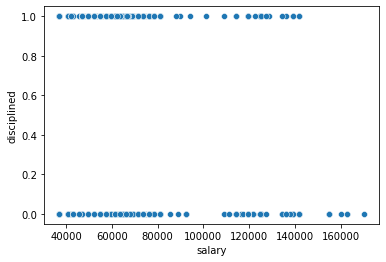

In [261]:
#df['_binned'] = pd.qcut(df['race'], q=5, labels=False)
sns.scatterplot(data=df, y='disciplined', x='salary')

[Text(0, 0, 'Criminal Misconduct'),
 Text(1, 0, 'Operation/Personnel Violations'),
 Text(2, 0, 'Supervisory Responsibilities'),
 Text(3, 0, 'Traffic'),
 Text(4, 0, 'Verbal Abuse'),
 Text(5, 0, 'Lockup Procedures'),
 Text(6, 0, 'Conduct Unbecoming (Off-duty)'),
 Text(7, 0, 'Use of Force'),
 Text(8, 0, 'False Arrest'),
 Text(9, 0, 'Illegal Search'),
 Text(10, 0, 'Drug / Alcohol Abuse'),
 Text(11, 0, 'Domestic'),
 Text(12, 0, 'Bribery / Official Corruption'),
 Text(13, 0, 'Other')]

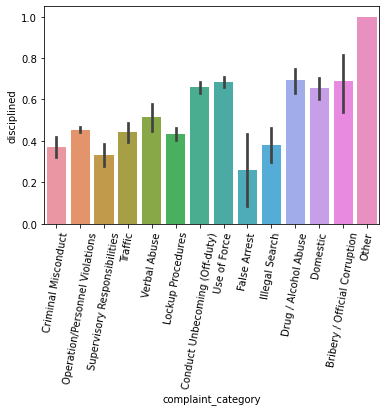

In [262]:
#df['_binned'] = pd.qcut(df['race'], q=5, labels=False)
ax = sns.barplot(data=df, y='disciplined', x='complaint_category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

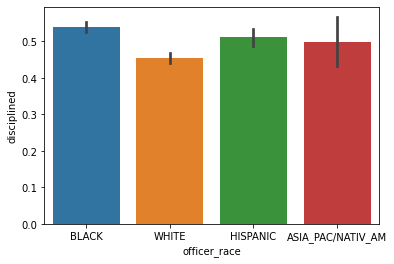

In [263]:
ax = sns.barplot(data=df, y='disciplined', x='officer_race')

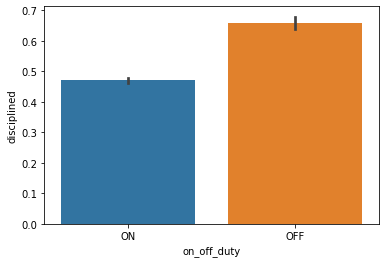

In [264]:
ax = sns.barplot(data=df, y='disciplined', x='on_off_duty')

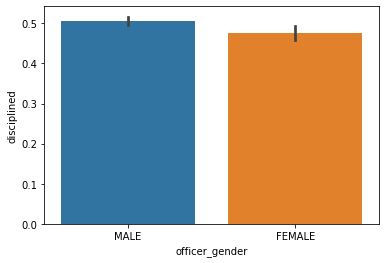

In [277]:
ax = sns.barplot(data=df, y='disciplined', x='officer_gender')

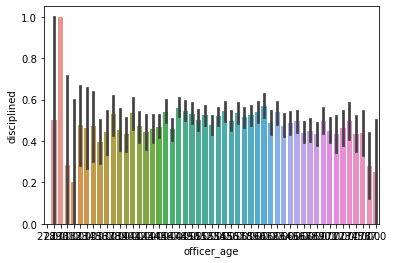

In [278]:
ax = sns.barplot(data=df, y='disciplined', x='officer_age')

In [265]:
df[df['complaint_descr'] == 'MISCELLANEOUS']['complaint_category'].value_counts()

Operation/Personnel Violations    507
Conduct Unbecoming (Off-duty)     328
Use of Force                      135
Criminal Misconduct                64
Supervisory Responsibilities       47
Illegal Search                     27
Traffic                            24
Lockup Procedures                  19
Verbal Abuse                       10
Drug / Alcohol Abuse               10
Bribery / Official Corruption      10
Domestic                            1
Name: complaint_category, dtype: int64

In [266]:
df['complaint_category'].value_counts()

Operation/Personnel Violations    6883
Use of Force                      1272
Conduct Unbecoming (Off-duty)     1223
Lockup Procedures                 1116
Traffic                            499
Criminal Misconduct                415
Domestic                           316
Drug / Alcohol Abuse               254
Supervisory Responsibilities       241
Verbal Abuse                       204
Illegal Search                     137
Bribery / Official Corruption       48
False Arrest                        23
Other                                1
Name: complaint_category, dtype: int64

In [268]:
dummy_df = pd.get_dummies(df[['complaint_category', 'rank', 'employee_status', 'age_at_hire', 'officer_gender']], prefix='dummy')
dummy_df.columns = dummy_df.columns.str.replace(' ', '_')

df = pd.concat([df, dummy_df], axis=1)
df.head()

,Unnamed: 0,UID,complaint_descr,complaint_code,cr_id,cv,final_finding,final_outcome,link_UID,disciplined,...,dummy_PO_AS_DETECTIVE,dummy_POLICE_OTHER,dummy_SERGEANT,dummy_CAREER_SERVICE,dummy_EXEMPT_BY_ORDINANCE,dummy_EXEMPT_CONFIDENTIAL,dummy_PROBATIONARY_CAREER_SERVICE,dummy_SENIOR_EXECUTIVE_SERVICE,dummy_FEMALE,dummy_MALE
4,8,110583.0,COMMISSION OF CRIME: MISCELLANEOUS,08N,C188852,1,SU,SUSTAINED-NO PENALTY,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
5,10,110583.0,OPERATION/PERSONNEL VIOLATION: MISCELLANEOUS,10Z,C202366,1,SU,Reprimand,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
13,26,110583.0,SUPERVISOR RESPONSIBILITY: PROPER DIRECTION -...,12B,C158787,1,SU,Reprimand,30048.0,0,...,0,0,1,1,0,0,0,0,0,1
25,138,124462.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C177882,1,SU,Reprimand,22519.0,0,...,0,0,1,1,0,0,0,0,0,1
27,162,117918.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C180161,1,SU,Reprimand,22860.0,0,...,0,0,1,1,0,0,0,0,0,1


In [269]:
df.shape

(12632, 62)

In [283]:
logit_model = smf.logit(formula = "disciplined~complaint_category+officer_race+on_off_duty+officer_gender", data = df).fit()
logit_model.summary()

         Current function value: 0.668406
         Iterations: 35


/Users/alexolmeta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            disciplined   No. Observations:                12621
Model:                          Logit   Df Residuals:                    12602
Method:                           MLE   Df Model:                           18
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.03569
Time:                        10:28:01   Log-Likelihood:                -8435.9
converged:                      False   LL-Null:                       -8748.2
Covariance Type:            nonrobust   LLR p-value:                5.597e-121
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                0.4477      0.363      1.234      0.217      -0.263       1.159
complaint_category[T.Conduct Unbecoming (Off-duty)]      0.0969      0.337      0.287      0.774      -0.564       0.758
complaint_category[T.Criminal Misconduct]               -1.3514      0.329     -4.113      0.000      -1.995      -0.707
complaint_category[T.Domestic]                          -0.1611      0.334     -0.482      0.630      -0.816       0.494
complaint_category[T.Drug / Alcohol Abuse]               0.2410      0.350      0.689      0.491      -0.444       0.926
complaint_category[T.False Arrest]                      -1.7862      0.570     -3.136      0.002      -2.903      -0.670
complaint_category[T.Illegal Search]                    -1.2536      0.359     -3.494      0.000      -1.957      -0.550
complaint_category[T.Lockup Procedures]                 -1.0314      0.318     -3.242      0.001      -1.655      -0.408
complaint_category[T.Operation/Personnel Violations]    -0.9737      0.313     -3.108      0.002      -1.588      -0.360
complaint_category[T.Other]                             14.6188   2443.459      0.006      0.995   -4774.474    4803.711
complaint_category[T.Supervisory Responsibilities]      -1.4195      0.341     -4.160      0.000      -2.088      -0.751
complaint_category[T.Traffic]                           -0.9852      0.325     -3.030      0.002      -1.622      -0.348
complaint_category[T.Use of Force]                       0.1207      0.323      0.373      0.709      -0.513       0.754
complaint_category[T.Verbal Abuse]                      -0.6797      0.343     -1.984      0.047      -1.351      -0.008
officer_race[T.BLACK]                                    0.1911      0.147      1.300      0.194      -0.097       0.479
officer_race[T.HISPANIC]                                 0.0225      0.152      0.148      0.883      -0.276       0.321
officer_race[T.WHITE]                                   -0.1822      0.147     -1.240      0.215      -0.470       0.106
on_off_duty[T.ON]                                        0.2461      0.112      2.199      0.028       0.027       0.465
officer_gender[T.MALE]                                   0.0987      0.045      2.207      0.027       0.011       0.186
========================================================================================================================
"""

Classification accuracy = 58.5%


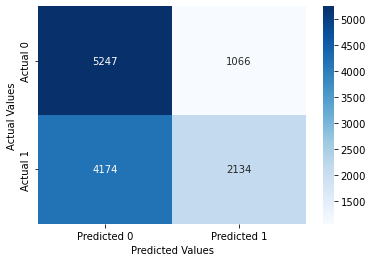

In [271]:
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
confusion_matrix_train(logit_model)

In [272]:
df.corr()

/var/folders/8x/j868ltjn1wjg33ylnmh2ltb00000gn/T/ipykernel_2025/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,UID,cv,link_UID,disciplined,sustained,salary,age_at_hire,officer_age,current_status,...,dummy_PO_AS_DETECTIVE,dummy_POLICE_OTHER,dummy_SERGEANT,dummy_CAREER_SERVICE,dummy_EXEMPT_BY_ORDINANCE,dummy_EXEMPT_CONFIDENTIAL,dummy_PROBATIONARY_CAREER_SERVICE,dummy_SENIOR_EXECUTIVE_SERVICE,dummy_FEMALE,dummy_MALE
Unnamed: 0,1.000000,-0.000659,0.220266,0.042012,-5.926519e-02,NaN,-0.347957,0.152770,-0.229238,0.166177,...,-0.056864,0.211479,-0.205357,-0.274008,-0.009410,-1.395389e-02,0.291291,-0.024374,0.246204,-0.246204
UID,-0.000659,1.000000,-0.025661,0.014755,-2.739311e-03,NaN,0.036167,-0.030113,0.018211,-0.012424,...,0.003880,-0.015004,0.012699,0.018786,-0.009528,7.649203e-03,-0.023017,0.013945,0.020889,-0.020889
cv,0.220266,-0.025661,1.000000,0.015573,-3.703523e-02,NaN,-0.364502,0.009369,-0.403349,0.254696,...,-0.088555,0.118094,-0.078299,-0.289712,-0.000951,-6.723281e-04,0.303517,-0.014046,-0.003853,0.003853
link_UID,0.042012,0.014755,0.015573,1.000000,-2.661064e-03,NaN,0.005904,0.011781,0.003504,0.001189,...,-0.011556,-0.011222,0.018545,-0.012731,-0.004161,-6.250154e-03,0.011912,0.006516,0.029657,-0.029657
disciplined,-0.059265,-0.002739,-0.037035,-0.002661,1.000000e+00,NaN,-0.028967,-0.009467,-0.017375,0.046565,...,-0.006768,0.044272,-0.037764,0.033048,-0.017798,-1.621044e-17,-0.023832,-0.033195,-0.024704,0.024704
sustained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,-0.347957,0.036167,-0.364502,0.005904,-2.896703e-02,NaN,1.000000,-0.078635,0.598751,-0.381294,...,0.134114,-0.580578,0.450186,0.428707,0.174771,2.163929e-02,-0.588613,0.480869,-0.053896,0.053896
age_at_hire,0.152770,-0.030113,0.009369,0.011781,-9.467109e-03,NaN,-0.078635,1.000000,0.469815,-0.215215,...,-0.058028,0.112961,-0.078538,0.028645,-0.013051,-1.270179e-02,-0.015375,-0.048636,0.124102,-0.124102
officer_age,-0.229238,0.018211,-0.403349,0.003504,-1.737451e-02,NaN,0.598751,0.469815,1.000000,-0.617070,...,0.080643,-0.189006,0.155703,0.445999,-0.001307,-5.935359e-04,-0.474912,0.050218,-0.014837,0.014837
current_status,0.166177,-0.012424,0.254696,0.001189,4.656479e-02,NaN,-0.381294,-0.215215,-0.617070,1.000000,...,-0.047636,0.138182,-0.122477,-0.211334,0.011103,1.418755e-02,0.229042,-0.043011,-0.000609,0.000609


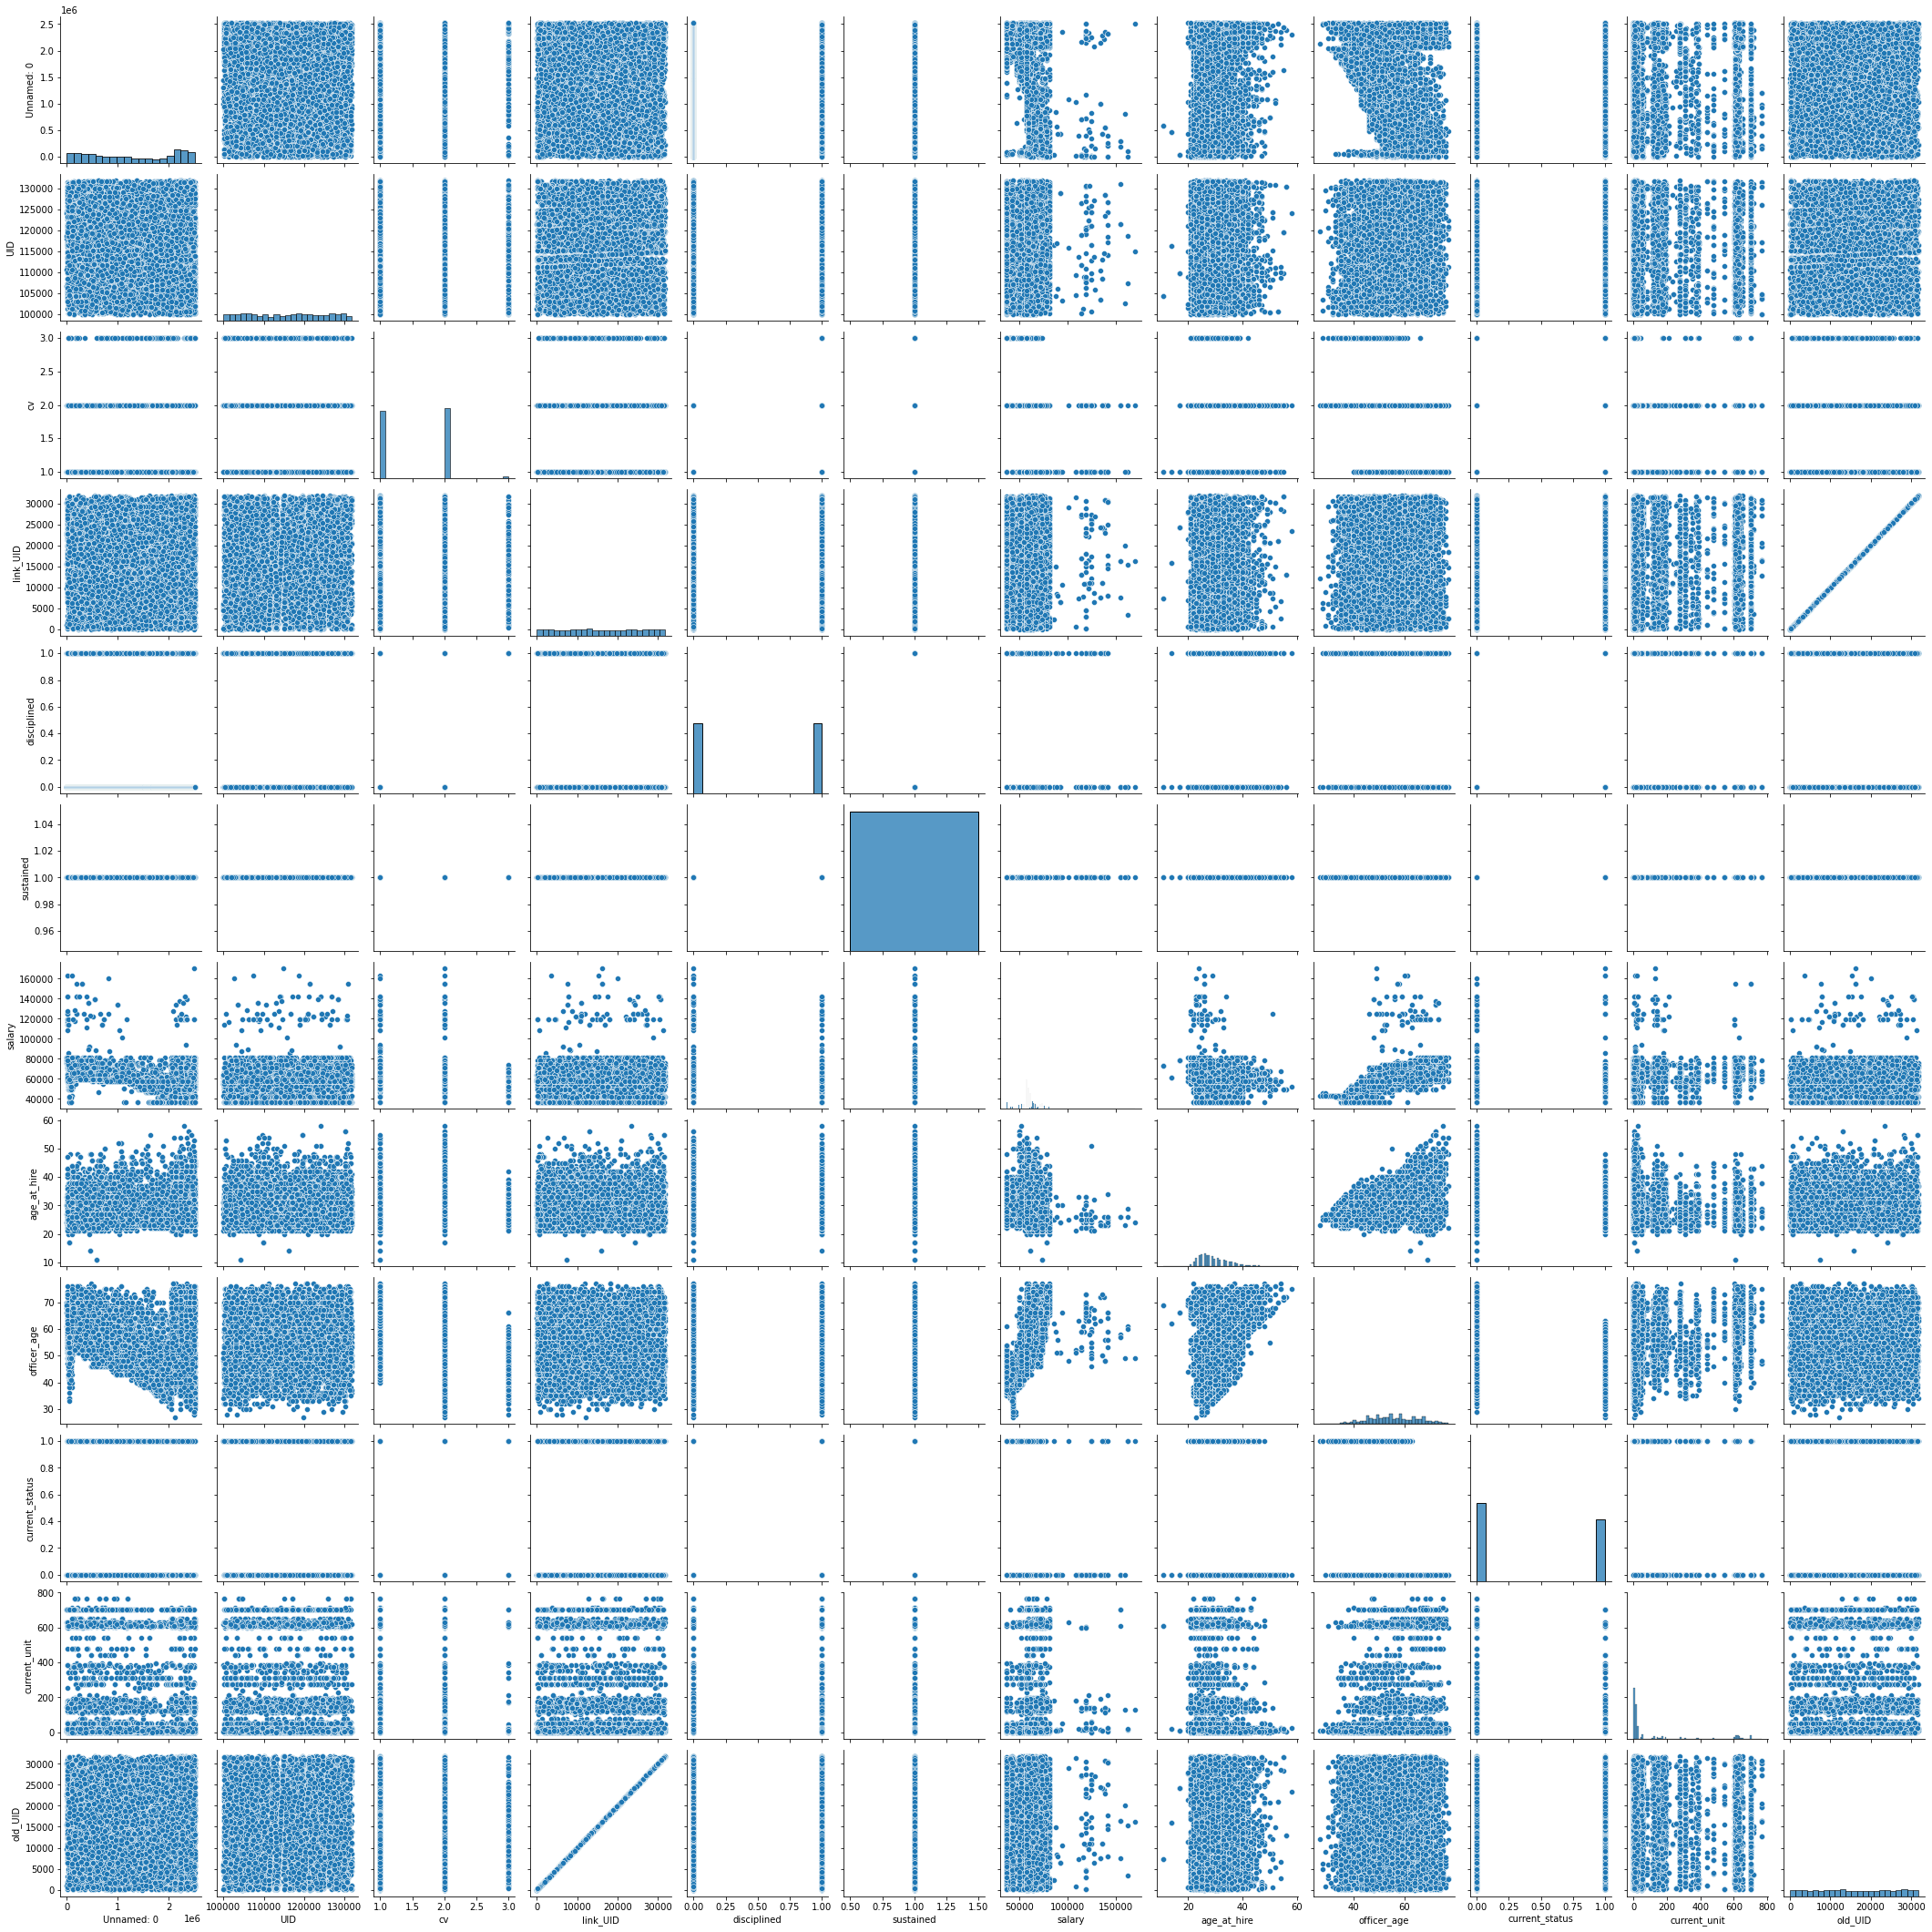

In [267]:
sns.pairplot(data=df)